---

**Étudiante :** Marwa El Kamil

**Titre :** Reconnaissance Faciale des Joueurs Marocains avec HOG et Random Forest

**Introduction :**
Ce notebook explore une méthode efficace pour la reconnaissance faciale des joueurs de football marocains en utilisant l'histogramme des orientations de gradient (HOG) pour l'extraction des caractéristiques et le modèle de forêt aléatoire (Random Forest) pour la classification. Cette approche combine les techniques avancées de traitement d'image et d'apprentissage automatique pour une identification précise.

**Contenu :**

1. **Importation des Bibliothèques** :
   - Importation des bibliothèques nécessaires telles que scikit-learn pour Random Forest, skimage pour HOG, et OpenCV pour le traitement d'images.

2. **Prétraitement des Données** :
   - Chargement des images des joueurs de football marocains.
   - Application de la transformation HOG sur chaque image pour extraire les caractéristiques visuelles.
   - Normalisation des images pour assurer la cohérence des données.

3. **Extraction des Caractéristiques avec HOG** :
   - Détail de la procédure d'extraction des caractéristiques à l'aide de HOG.
   - Analyse des caractéristiques extraites pour comprendre leur pertinence.

4. **Construction et Entraînement du Modèle Random Forest** :
   - Création d'un modèle de forêt aléatoire avec un nombre spécifique d'arbres.
   - Entraînement du modèle sur les données prétraitées et extraction des caractéristiques HOG.

5. **Évaluation du Modèle** :
   - Utilisation de techniques d'évaluation comme la matrice de confusion et le rapport de classification pour mesurer la performance du modèle.
   - Ajustement des paramètres du modèle pour améliorer la précision.

6. **Prédiction et Visualisation** :
   - Prédiction des labels des joueurs sur de nouvelles images.
   - Visualisation des résultats de la prédiction et comparaison avec les véritables labels.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from imutils import paths
from pathlib import Path
import numpy as np
import imutils
import cv2
import os

In [4]:
def loadNewBD(inputPath):
    # Récupération des chemins de toutes les images dans le répertoire donné
    imagePaths = list(paths.list_images(inputPath))
   
    # Initialisation de listes pour stocker les visages et les étiquettes (labels)
    faces = list()
    labels = list()
 
    # Parcourir chaque chemin d'image
    for imagePath in imagePaths:
        # Lire l'image et récupérer le label (étiquette) de l'image
        # Le label est généralement dérivé du nom de fichier
        image = cv2.imread(imagePath) # Lire l'image à l'aide de OpenCV
        name = Path(imagePath).stem   # Extraire le nom de fichier sans extension comme label

        # Ajouter l'image et son label respectif aux listes
        faces.append(image) # Ajouter l'image à la liste des visages
        labels.append(name) # Ajouter le label à la liste des labels

    # Convertir les listes de visages et de labels en tableaux NumPy pour un traitement ultérieur
    faces = np.array(faces)
    labels = np.array(labels)

    # Retourner le tuple contenant les visages et les labels
    return (faces, labels)

cette fonction "loadNewBD" qui prend un chemin vers un dossier contenant des images. Il lit chaque image, extrait son nom comme label, et stocke les images et leurs labels respectifs dans des listes, qui sont ensuite converties en tableaux NumPy avant d'être retournées. Cette fonction est utile pour charger des données d'image pour des tâches de reconnaissance ou de traitement d'image.

In [5]:
(visages, names) = loadNewBD("data_players")

In [6]:
names

array(['Walid Reguragui_215', 'Anass Zeroury_127', 'Anass Zeroury_133',
       'saiss_193', 'saiss_187', 'boukhlal_153', 'boukhlal_147',
       'boukhlal_146', 'boukhlal_152', 'saiss_186', 'saiss_192',
       'Anass Zeroury_132', 'Anass Zeroury_126', 'Walid Reguragui_214',
       'Walid Reguragui_216', 'Anass Zeroury_130', 'Anass Zeroury_124',
       'Anass Zeroury_118', 'saiss_184', 'saiss_190', 'aguerd_109',
       'boukhlal_144', 'boukhlal_150', 'boukhlal_151', 'boukhlal_145',
       'aguerd_108', 'saiss_191', 'saiss_185', 'Anass Zeroury_119',
       'Anass Zeroury_125', 'Anass Zeroury_131', 'Walid Reguragui_217',
       'Walid Reguragui_207', 'Walid Reguragui_213', 'Anass Zeroury_135',
       'Anass Zeroury_121', 'saiss_195', 'boukhlal_141', 'boukhlal_155',
       'boukhlal_154', 'boukhlal_140', 'saiss_194', 'Anass Zeroury_120',
       'Anass Zeroury_134', 'Walid Reguragui_212', 'Walid Reguragui_206',
       'Walid Reguragui_210', 'Anass Zeroury_122', 'Anass Zeroury_136',
       's

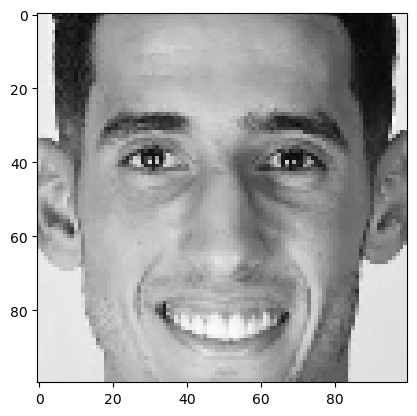

In [7]:
 plt.imshow(visages[20], cmap = 'gray')

In [8]:
def extractingLabels(names):
    # Initialisation d'une liste vide pour les labels
    labels = []

    # Parcourir chaque nom dans la liste des noms
    for name in names:
        # Extraire le label en retirant les trois derniers caractères
        # et ajouter ce label à la liste des labels
        labels.append(name[:len(name)-3])

    # Convertir la liste des labels en un tableau NumPy
    labels = np.array(labels)

    # Retourner le tableau des labels
    return labels


In [13]:
Labels = extractingLabels(names)
Labels

array(['Walid Reguragui_', 'Anass Zeroury_', 'Anass Zeroury_', 'saiss_',
       'saiss_', 'boukhlal_', 'boukhlal_', 'boukhlal_', 'boukhlal_',
       'saiss_', 'saiss_', 'Anass Zeroury_', 'Anass Zeroury_',
       'Walid Reguragui_', 'Walid Reguragui_', 'Anass Zeroury_',
       'Anass Zeroury_', 'Anass Zeroury_', 'saiss_', 'saiss_', 'aguerd_',
       'boukhlal_', 'boukhlal_', 'boukhlal_', 'boukhlal_', 'aguerd_',
       'saiss_', 'saiss_', 'Anass Zeroury_', 'Anass Zeroury_',
       'Anass Zeroury_', 'Walid Reguragui_', 'Walid Reguragui_',
       'Walid Reguragui_', 'Anass Zeroury_', 'Anass Zeroury_', 'saiss_',
       'boukhlal_', 'boukhlal_', 'boukhlal_', 'boukhlal_', 'saiss_',
       'Anass Zeroury_', 'Anass Zeroury_', 'Walid Reguragui_',
       'Walid Reguragui_', 'Walid Reguragui_', 'Anass Zeroury_',
       'Anass Zeroury_', 'saiss_', 'boukhlal_', 'boukhlal_', 'boukhlal_',
       'saiss_', 'Anass Zeroury_', 'Walid Reguragui_', 'YassineBono_',
       'photo hakimi_', 'photo hakimi_', 'p

La fonction extractingLabels prend en entrée une liste de noms et extrait des étiquettes (labels) en retirant les trois derniers caractères de chaque nom.

In [14]:
from sklearn.preprocessing import LabelEncoder

def encode(labels):
    # Créer une instance de LabelEncoder
    le = LabelEncoder()

    # Ajuster le LabelEncoder aux étiquettes fournies et les transformer
    # Cela convertit les étiquettes en valeurs numériques
    labels = le.fit_transform(labels)

    # Retourner les étiquettes transformées
    return labels


LabelEncoder : Cette classe de scikit-learn est utilisée pour transformer des étiquettes non numériques (comme des noms de catégories) en valeurs numériques. Ceci est souvent nécessaire dans le traitement de données, car de nombreux algorithmes de machine learning préfèrent travailler avec des données numériques.
fit_transform() : Cette méthode ajuste le modèle LabelEncoder aux données fournies et, en même temps, transforme les étiquettes en valeurs numériques. Chaque classe unique se voit attribuer un entier unique.

In [15]:
labels = encode(Labels)
labels

array([1, 0, 0, 6, 6, 4, 4, 4, 4, 6, 6, 0, 0, 1, 1, 0, 0, 0, 6, 6, 3, 4,
       4, 4, 4, 3, 6, 6, 0, 0, 0, 1, 1, 1, 0, 0, 6, 4, 4, 4, 4, 6, 0, 0,
       1, 1, 1, 0, 0, 6, 4, 4, 4, 6, 0, 1, 2, 5, 5, 5, 5, 2, 2, 2, 5, 5,
       5, 2, 2, 4, 2, 2, 5, 5, 2, 5, 5, 4, 4, 5, 5, 2, 5, 5, 5, 5, 5, 5,
       5, 5, 2, 5, 5, 5, 5, 5, 5, 2, 1, 1, 3, 3, 1, 1, 6, 6, 3, 3, 3, 6,
       1, 6, 6, 1, 0, 6, 3, 3, 4, 3, 3, 6, 0, 0, 6, 6, 1, 1, 0, 3, 3, 3,
       3, 0, 1, 6])

In [16]:
from skimage.feature import hog
from skimage import exposure
import cv2

def HOG(face):
    # Convertir l'image de visage en niveaux de gris
    # Le HOG est généralement calculé sur des images en niveaux de gris
    face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)

    # Calculer l'histogramme des orientations de gradient (HOG) pour l'image
    # visualize=True permet de retourner l'image du gradient HOG en plus du descripteur
    fd, hog_image = hog(face, orientations=9, pixels_per_cell=(8, 8),
                        cells_per_block=(2, 2), visualize=True, channel_axis=None)

    # Retourner l'image HOG
    return hog_image


La fonction HOG est conçue pour calculer l'histogramme des orientations de gradient (HOG) d'une image de visage. Elle utilise la bibliothèque skimage pour cette tâche. 

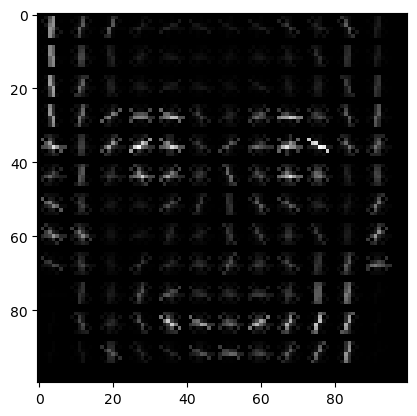

In [17]:
im = HOG(visages[20])
plt.imshow(im, cmap = 'gray')

In [18]:
def extractHOGBD(faces):
    # Initialiser une liste pour stocker les caractéristiques HOG des visages
    facesHOG = []

    # Parcourir chaque visage dans la liste fournie
    for i in range(len(faces)):
        # Appliquer la fonction HOG sur le visage actuel
        hog = HOG(faces[i])

        # Ajouter les caractéristiques HOG du visage à la liste
        facesHOG.append(hog)

    # Convertir la liste des caractéristiques HOG en un tableau NumPy
    facesHOG = np.array(facesHOG)

    # Retourner le tableau des caractéristiques HOG
    return facesHOG


La fonction extractHOGBD vise à appliquer la fonction HOG à chaque image dans un ensemble de données d'images de visages (faces) pour extraire leurs caractéristiques en utilisant l'histogramme des orientations de gradient (HOG). Elle stocke ensuite ces caractéristiques HOG dans un tableau NumPy et le retourne

In [19]:
faces = extractHOGBD(visages)

In [20]:
from sklearn.model_selection import train_test_split
def split(faces, labels):
        x_train , x_test , y_train , y_test = train_test_split(faces , labels , test_size =0.20, shuffle = True, stratify = labels )
        return  x_train , x_test , y_train , y_test

In [21]:
x_train , x_test , y_train , y_test = split(faces,labels)

In [22]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(108, 100, 100)
(28, 100, 100)
(108,)
(28,)


In [23]:
x_train = x_train /255
x_test = x_test/ 255

In [24]:
nsamples, nx, ny = x_train.shape
x_train = x_train.reshape((nsamples,nx*ny))

In [25]:
nsamples2, nx2, ny2 = x_test.shape
x_test = x_test.reshape((nsamples2,nx2*ny2))

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Création du modèle avec 100 arbres
# n_estimators=100 spécifie le nombre d'arbres dans la forêt
# random_state=0 garantit la reproductibilité des résultats
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Entraînement du modèle sur les données
# x_train contient les caractéristiques d'entraînement
# y_train contient les étiquettes correspondantes
clf.fit(x_train, y_train)


RandomForestClassifier(random_state=0)

In [31]:
clf.score(x_train, y_train)

1.0

In [32]:
clf.score(x_test, y_test)

0.6428571428571429

In [33]:
labels_map = {
    0: 'Zaroury',
    1: 'Regueragui',
    2: 'Bono',
    3: 'Aguerd',
    4: 'Boukhlal',
    5: 'Hakimi',
    6: 'Sais'
}
new_img2 = cv2.imread('zaroury.jpeg')

# Resize and normalize the image
new_img2 = HOG(new_img2)
new_img2 = cv2.resize(new_img2, (100, 100))
new_img2 = new_img2 / 255.

# Flatten the image
new_img_flattened = new_img2.reshape(1, 100*100)

# Use the model to predict the label of the new image
predicted_label = clf.predict(new_img_flattened)

# Get the label with the highest probability
predicted_label = np.argmax(predicted_label)
original_label = labels_map[predicted_label]
print("The predicted label for new image is:",  original_label)



The predicted label for new image is: Zaroury


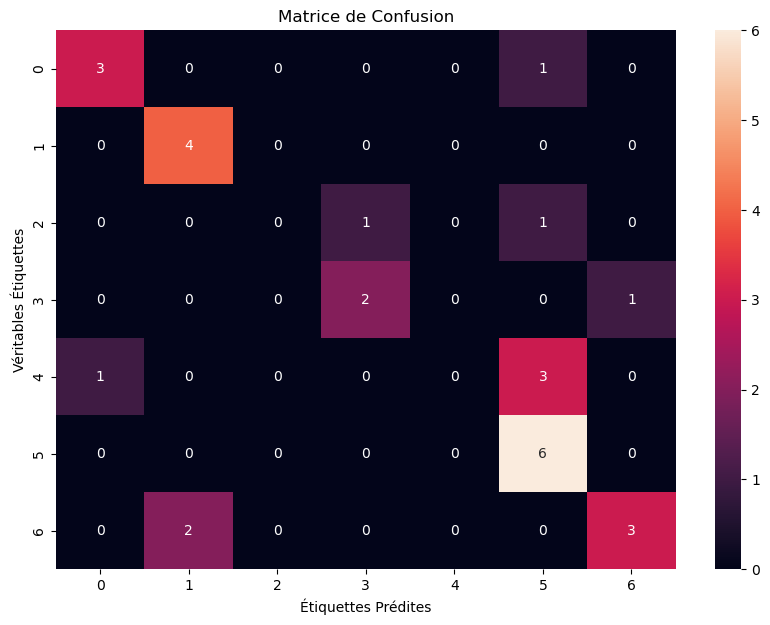

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # Pour une visualisation améliorée de la matrice de confusion

# Effectuer des prédictions sur l'ensemble de test
y_pred = clf.predict(x_test)

# Calcul de la matrice de confusion
conf_mat = confusion_matrix(y_test, y_pred)

# Visualisation de la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt="d")
plt.title("Matrice de Confusion")
plt.ylabel('Véritables Étiquettes')
plt.xlabel('Étiquettes Prédites')
plt.show()


La matrice de confusionest un outil utilisé en apprentissage automatique pour évaluer la performance d'un modèle de classification. Chaque ligne de la matrice représente les instances dans une classe réelle, tandis que chaque colonne représente les instances dans une classe prédite. Voici une interprétation de votre matrice :

- **Diagonale (de haut à gauche à bas à droite)** : Les valeurs sur la diagonale (3, 4, 1, 2, 3, 6, 3) représentent le nombre de prédictions correctes pour chaque classe. Par exemple, il y a 3 instances correctement prédites pour la classe 0, 4 pour la classe 1, et ainsi de suite jusqu'à 3 prédictions correctes pour la classe 6.

- **Hors diagonale** : Les valeurs hors de la diagonale représentent les erreurs de classification. Par exemple, il y a 1 instance de la classe 4 qui a été incorrectement prédite comme appartenant à la classe 0, et 1 instance de la classe 2 qui a été incorrectement prédite comme la classe 4.

- **Analyse des erreurs** :
   - La classe 5 semble être la mieux prédite avec 6 prédictions correctes et aucune erreur.
   - La classe 1 a été parfaitement prédite avec 4 instances correctes et aucune erreur.
   - Les classes 2 et 3 semblent être les plus difficiles à prédire correctement, avec un nombre relativement élevé d'erreurs. Par exemple, la classe 2 a été confondue avec la classe 4 une fois et vice versa.

- **Performance globale** : Pour évaluer la performance globale du modèle, on peut calculer la précision globale, qui est la somme des valeurs sur la diagonale divisée par le total des prédictions. Cela donne une idée de la capacité du modèle à classer correctement toutes les classes.

Cette matrice nous donne des indications précieuses sur les points forts et les faiblesses de votre modèle de classification. Une analyse détaillée des erreurs peut vous aider à comprendre comment améliorer votre modèle, que ce soit par le choix de meilleurs descripteurs, un réglage des hyperparamètres, ou une collecte de données supplémentaires pour les classes mal prédites.